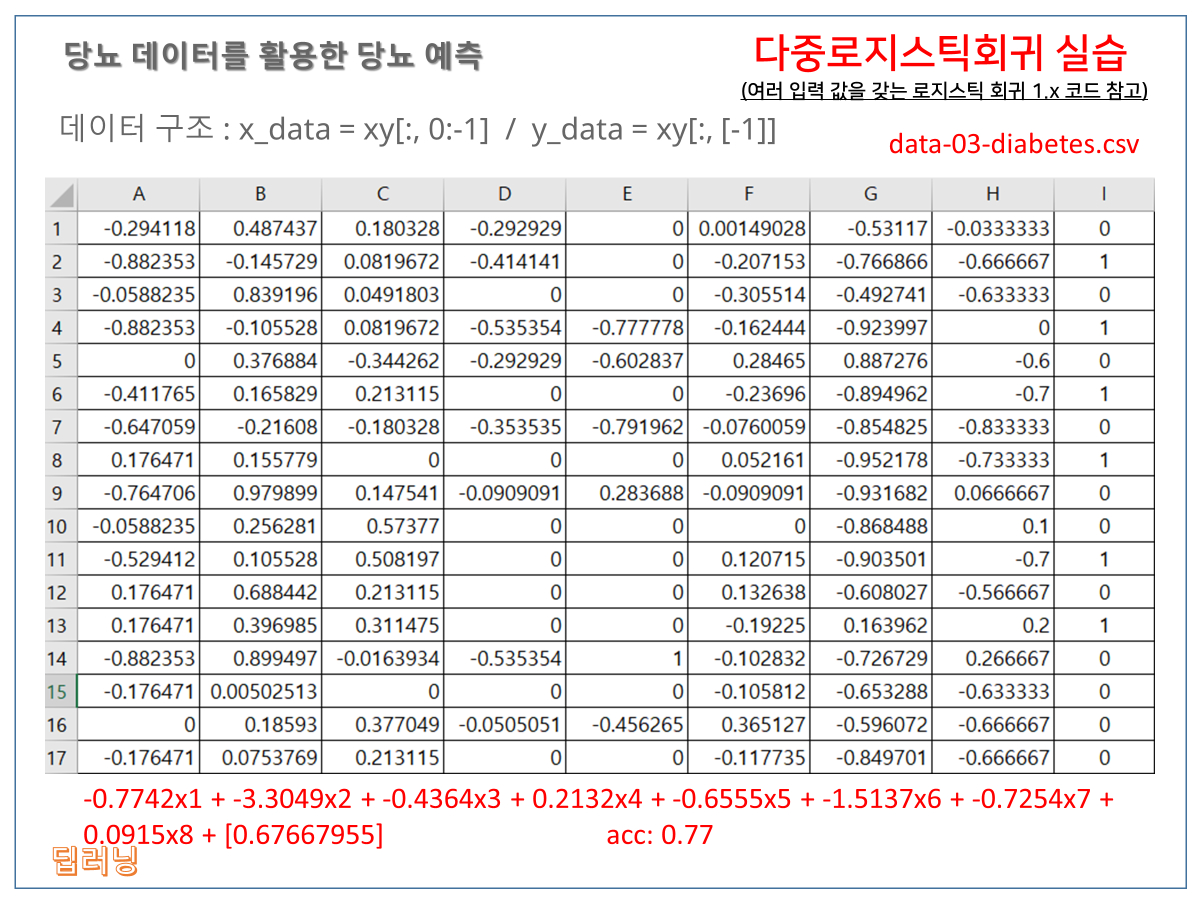
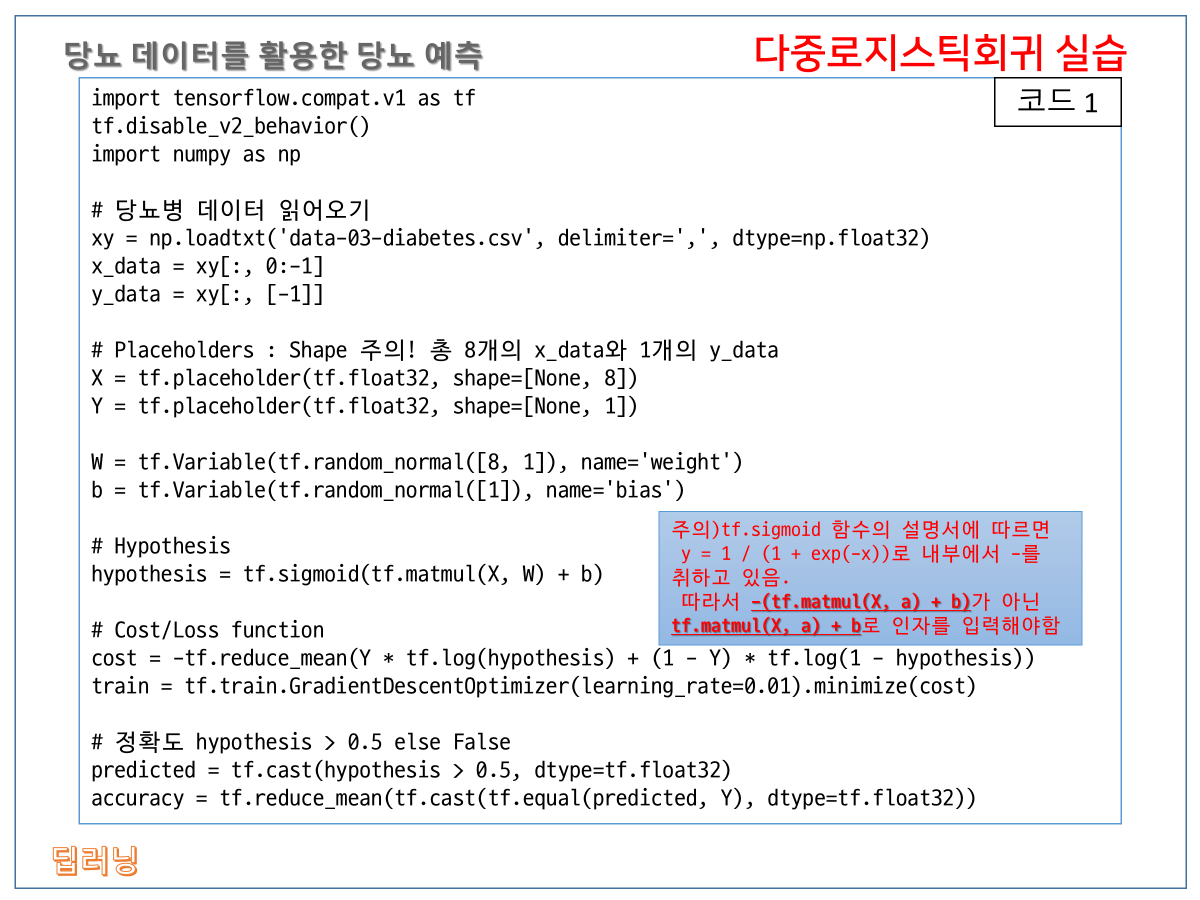
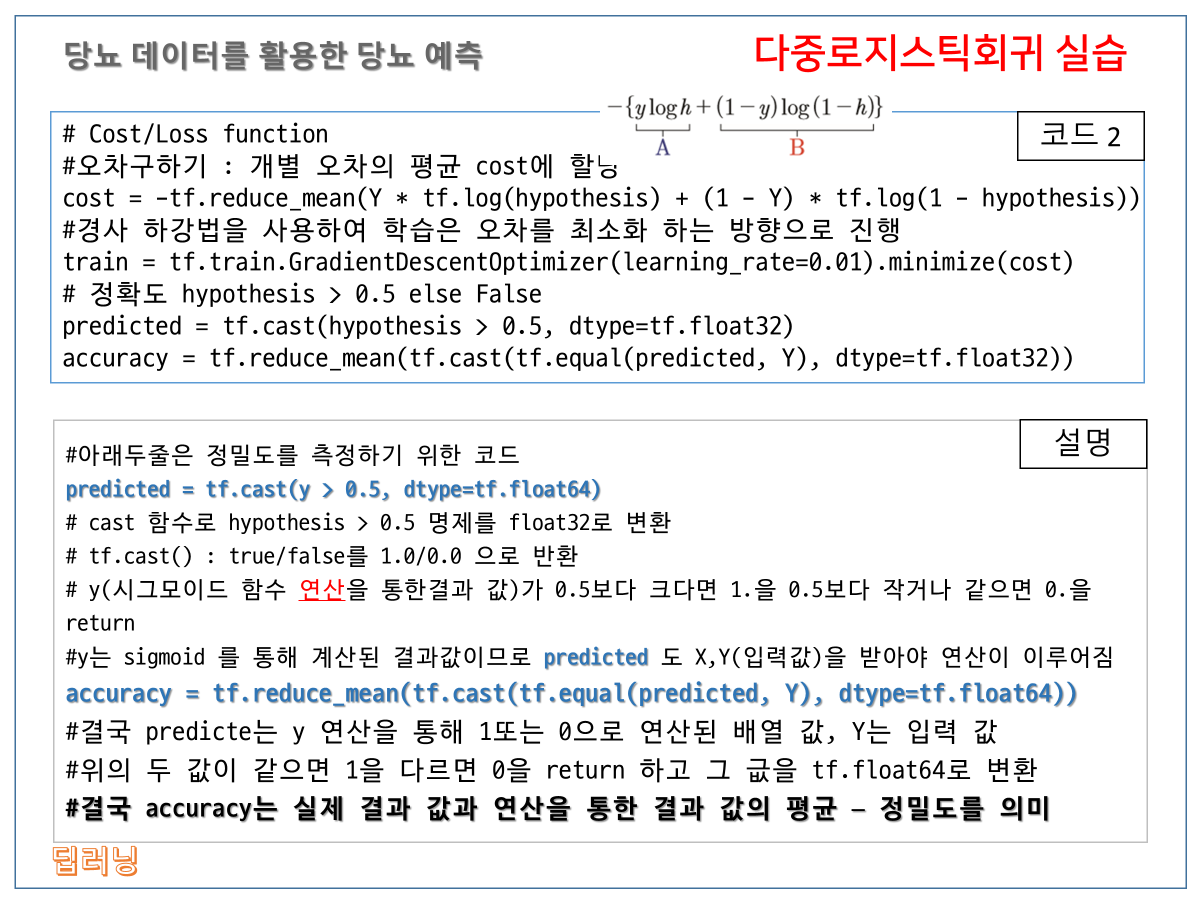
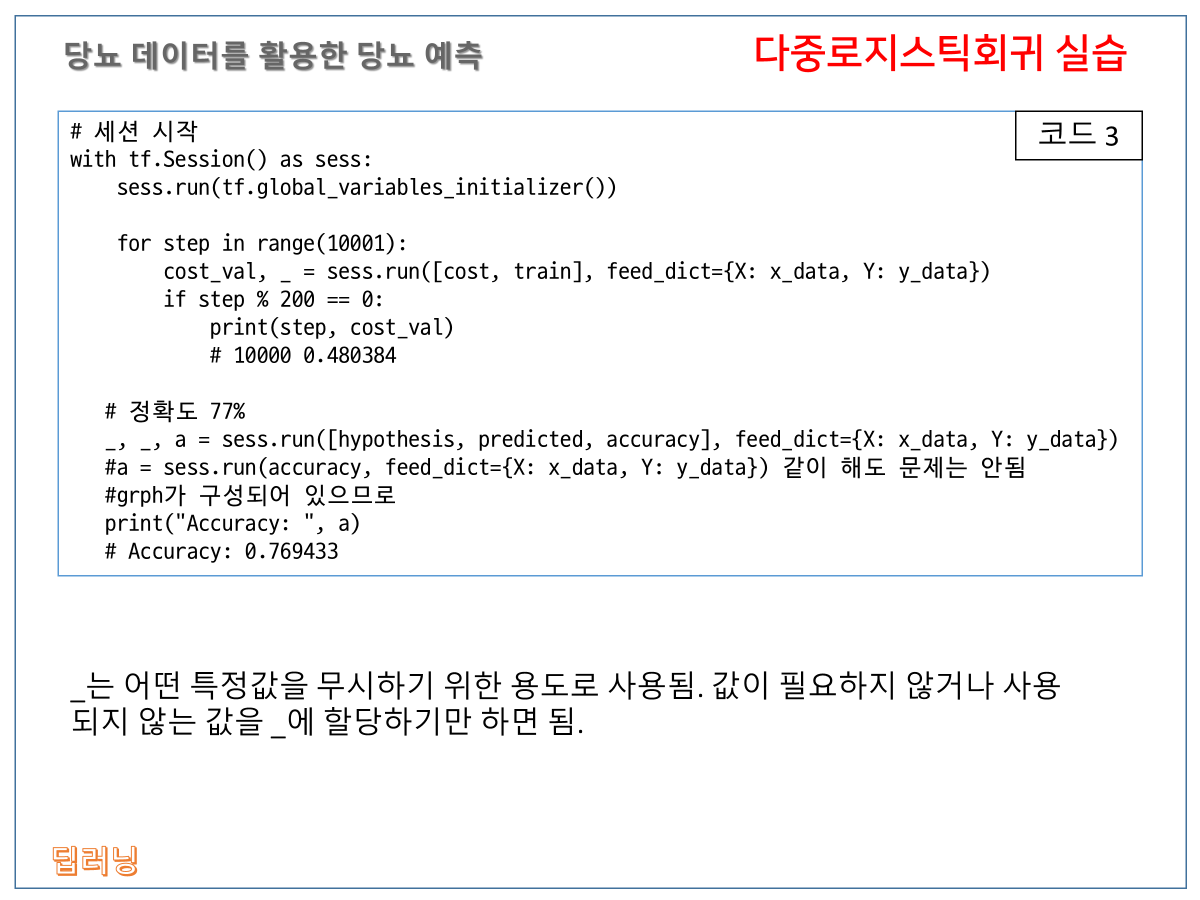

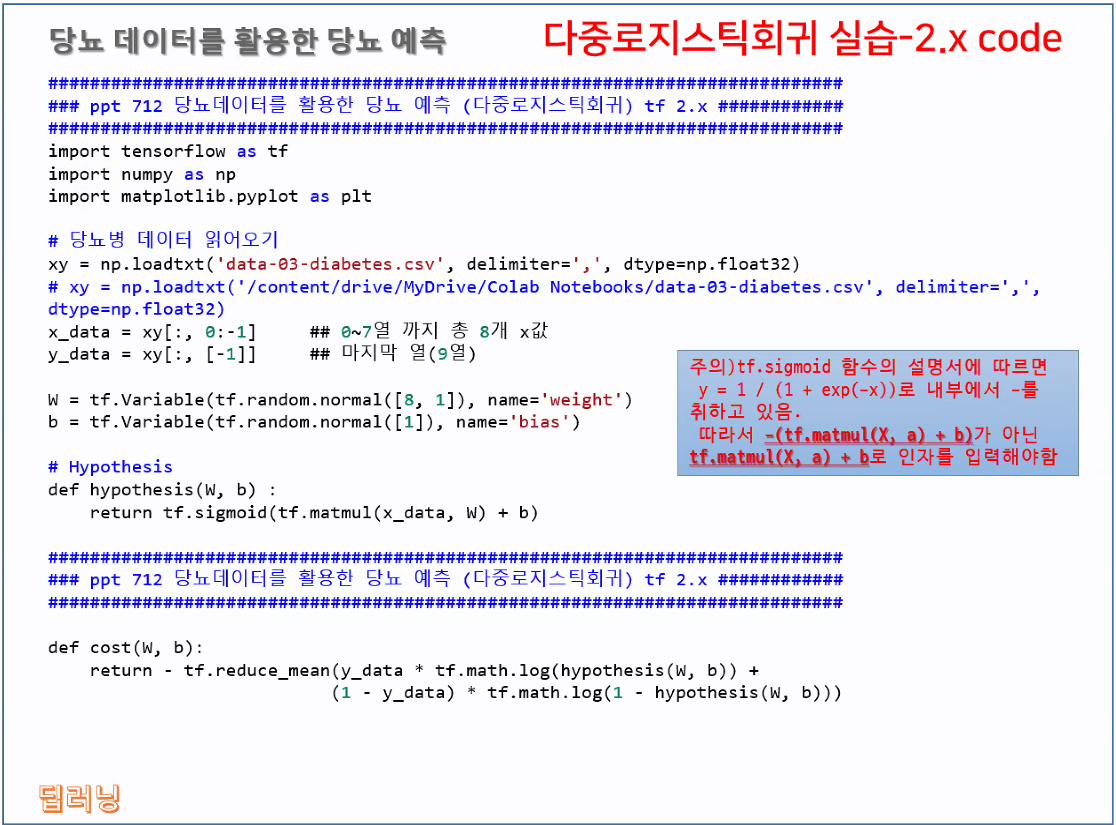

In [3]:
############################################################################
### ppt 712 당뇨데이터를 활용한 당뇨 예측 (다중로지스틱회귀) tf 2.x ############
############################################################################
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

# 당뇨병 데이터 읽어오기
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
# xy = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]     ## 0~7열 까지 총 8개 x값
y_data = xy[:, [-1]]     ## 마지막 열(9열)

W = tf.Variable(tf.random.normal([8, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
def hypothesis(W, b) :
    return tf.sigmoid(tf.matmul(x_data, W) + b)

############################################################################
### ppt 712 당뇨데이터를 활용한 당뇨 예측 (다중로지스틱회귀) tf 2.x ############
############################################################################

def cost(W, b):
    return - tf.reduce_mean(y_data * tf.math.log(hypothesis(W, b)) + 
                           (1 - y_data) * tf.math.log(1 - hypothesis(W, b)))

def graph():
    import matplotlib as mpl
    mpl.rc('font', family='Malgun Gothic') # 한글 설정
    mpl.rc('axes', unicode_minus=False)    # 음수부호 설정
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()   # x축을 공유하는 두개의 y축
    ax0.set_title("학습 회수에 따른 오차(cost)와 accuracy변화")
    ax0.plot(cost_arr, 'r-', label="y0")
    ax0.set_ylabel("y0")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="y1")
    ax1.set_ylabel("y1")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

opt = tf.keras.optimizers.SGD(learning_rate=0.01)

epoch_arr = []
cost_arr = []
accuracy_arr = []

############################################################################
### ppt 712 당뇨데이터를 활용한 당뇨 예측 (다중로지스틱회귀) tf 2.x ############
############################################################################

for step in range(10001): # steps
    with tf.GradientTape() as tape:
        cost_value = cost(W, b)
    gradients = tape.gradient(cost_value, [W, b])
    opt.apply_gradients(zip(gradients, [W, b]))
    
    predicted = tf.cast(hypothesis(W, b) > 0.5, dtype=tf.float64) ## 학습중인 W, b로 예측한 값(텐서)
    epoch_arr.append(step)                    # 학습수 누적 array
    cost_arr.append(cost_value.numpy())       # cost 누적 array
    accuracy = np.mean(y_data == predicted)   # y_data와 계산된 predicted 요소가 일치하는 확률
    accuracy_arr.append(accuracy)             # accuracy 누적 array
    
    if step % 500 == 0: 
        print("epochs=%d, cost=%.8f, W1=%.8f, W2=%.8f,... b=%.8f, accuracy=%.8f" % 
              (step, cost_value, W.numpy()[0,0], W.numpy()[1, 0], b.numpy()[0], accuracy)) 


graph()   # cost와 accuracy 그래프 그리기

print("========================================================")
print("W =", W.numpy())
print("b =", b.numpy()[0])
# print("y_data =", y_data)
# print("sigmoid =", hypothesis(W, b).numpy())

predicted = tf.cast(hypothesis(W, b) > 0.5, dtype=tf.float64)
accuracy = np.mean(y_data == predicted) 
# accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_data), dtype=tf.float64)).numpy()

# print("predicted =", predicted.numpy())
print("Accuracy =", accuracy)


FileNotFoundError: data-03-diabetes.csv not found.